# Задание

1. Построить гистограмму и с помощью описательной статистики охарактеризовать рассматриваемый бизнес-процесс. (Текстовое описание в ячейке Markdown).
Постройте гистограммы распределения цен для каждой категории (по количеству комнат). Какие выводы можно сделать на основе полученных гистограмм? 

(Текстовое описание в ячейке Markdown)

2. Оценить корреляцию.
Используя знакомые вам методы, дайте оценку корреляции цены и площади квартиры отдельно по каждой категории (по количеству комнат). Какие выводы можно сделать из этой оценки?

3. Рассчитать квантили. Рассчитайте границы квартилей распределения цен на 2-х квартиры площадью более 40 кв. метров.

4. Решить задачу.
Вы являетесь риэлтором, ваша прибыль это комиссия 3% от суммы сделки купли-продажи квартир (цена квартиры). В текущем квартале у вас ожидается 25 сделок купли-продажи 3-х комнатных квартир. Оцените вероятность того, что ваша суммарная прибыль от этих продаж превысит 9 млн. 200 тыс.
*В каждой категории разная степень корреляции. т.е. у 3 комнатных она может быть иная, чем у однокомнатных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np


In [2]:
df = pd.read_csv('bd_rieltor.csv')

In [3]:
# основные колонки из таблицы
df.head()

,No,Rooms,DistMetro,Area,Price
0,1,3,12,56,9396
1,2,2,4,54,9785
2,3,1,2,31,5783
3,4,2,8,48,9123
4,5,1,11,31,5662


In [4]:
df.describe()

,No,Rooms,DistMetro,Area,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,1.999200,9.588000,47.558800,8550.912200
std,1443.520003,0.813715,5.795151,17.167431,2985.530681
min,1.000000,1.000000,0.000000,21.000000,2825.000000
25%,1250.750000,1.000000,5.000000,31.000000,5904.750000
50%,2500.500000,2.000000,10.000000,48.000000,8407.500000
75%,3750.250000,3.000000,15.000000,59.000000,10652.000000
max,5000.000000,3.000000,19.000000,83.000000,17614.000000


# Гистограммы цен

Text(0.5, 0, 'Цена однокомнатной квартиры')

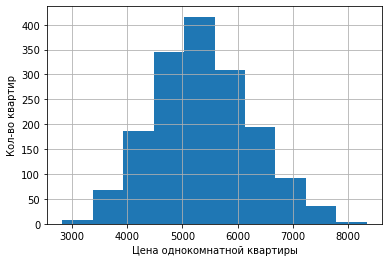

In [5]:
price = df['Price']
price_r_1 = price[df['Rooms'] == 1]
price_r_2 = price[df['Rooms'] == 2]
price_r_3 = price[df['Rooms'] == 3]

hist1 = price_r_1.hist()
hist1.set_ylabel('Кол-во квартир')
hist1.set_xlabel('Цена однокомнатной квартиры')

Text(0.5, 0, 'Цена 2-комнатной квартиры')

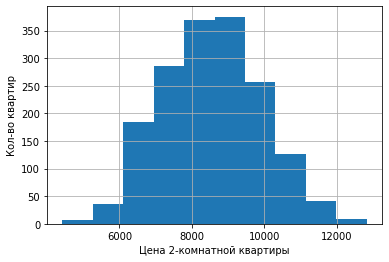

In [6]:
hist2 = price_r_2.hist()
hist2.set_ylabel('Кол-во квартир')
hist2.set_xlabel('Цена 2-комнатной квартиры')

Text(0.5, 0, 'Цена 3-комнатной квартиры')

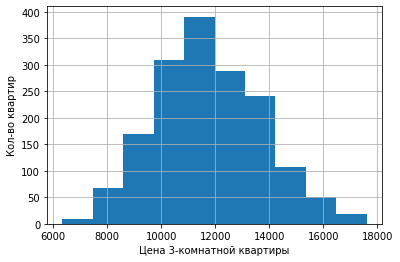

In [7]:
hist3 = price_r_3.hist()
hist3.set_ylabel('Кол-во квартир')
hist3.set_xlabel('Цена 3-комнатной квартиры')

# Корреляция

In [8]:
room1 = df[df['Rooms'] == 1]
room2 = df[df['Rooms'] == 2]
room3 = df[df['Rooms'] == 3]

In [9]:
room1[['Price', 'Area']].cov()

,Price,Area
Price,780506.330905,1989.519167
Area,1989.519167,11.899206


In [10]:
ar_pr = room1[['Price', 'Area']].cov()['Area']['Price']
corr1 = ar_pr / (statistics.pstdev(room1['Price']) * statistics.pstdev(room1['Area']))
print('{}\n{}'.format(corr1, corr1 * 100))

0.6532254507465836
65.32254507465835


In [11]:
room1[['Price', 'Area']].corr()

,Price,Area
Price,1.000000,0.652831
Area,0.652831,1.000000


In [12]:
room2[['Price', 'Area']].cov()

,Price,Area
Price,1.875752e+06,5793.161991
Area,5.793162e+03,35.914814


In [13]:
ar_pr2 = room2[['Price', 'Area']].cov()['Area']['Price']
corr2 = ar_pr2 / (statistics.pstdev(room2['Price']) * statistics.pstdev(room2['Area']))
print('{}\n{}'.format(corr2, corr2 * 100))

0.7062334126095113
70.62334126095114


In [14]:
room2[['Price', 'Area']].corr()

,Price,Area
Price,1.000000,0.705816
Area,0.705816,1.000000


In [15]:
room3[['Price', 'Area']].cov()

,Price,Area
Price,3.840079e+06,13052.97479
Area,1.305297e+04,79.99979


In [16]:
ar_pr3 = room3[['Price', 'Area']].cov()['Area']['Price']
corr3 = ar_pr3 / (statistics.pstdev(room3['Price']) * statistics.pstdev(room3['Area']))
print('{}\n{}'.format(corr3, corr3 * 100))

0.7451742210719958
74.51742210719958


# Квантили

In [17]:
room240 = room2[room2['Area'] > 40]
room240.quantile([0.1, 0.25, 0.5, 0.75], axis = 0) 
print('Квантиль 10% : {}'.format(np.quantile(room240['Price'], 0.1)))
print('Квантиль 25% : {}'.format(np.quantile(room240['Price'], 0.25)))
print('Квантиль 50% : {}'.format(np.quantile(room240['Price'], 0.5)))
print('Квантиль 75% : {}'.format(np.quantile(room240['Price'], 0.75)))

Квантиль 10% : 7146.0
Квантиль 25% : 7924.0
Квантиль 50% : 8812.0
Квантиль 75% : 9684.5


# Задача

In [18]:
room3 = price[df['Rooms'] == 3]

N = room3.count()
print('Количество: ', N)
print('Средняя цена: ', round(room3.mean(), 3))

pr = round(9200/0.03, 3)
pr1 = pr/25
print('Для получения прибыли нужно продать квартир на сумму: ', pr, ' (тыс. руб.)')
print('Для получения прибыли с 1 сделки нужно получить сумму: ', pr1, ' (тыс. руб.)')
print(pr)

count = room3[df['Price'] >= pr1].count()
print('Количество квартир стоимостью 12200-12500 тыс. руб. ', count)

V = round(count / N, 3)
print('Вероятность: ', V * 100, '%')


Количество:  1653
Средняя цена:  11749.978
Для получения прибыли нужно продать квартир на сумму:  306666.667  (тыс. руб.)
Для получения прибыли с 1 сделки нужно получить сумму:  12266.66668  (тыс. руб.)
306666.667
Количество квартир стоимостью 12200-12500 тыс. руб.  616
Вероятность:  37.3 %


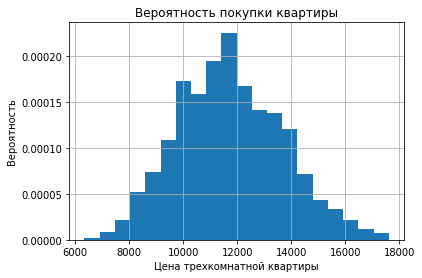

In [19]:
count, bins, ignored=plt.hist(room3, 20, density=True)
plt.title('Вероятность покупки квартиры')
plt.ylabel('Вероятность')
plt.xlabel('Цена трехкомнатной квартиры')
plt.grid(True)
plt.show()